# Analysis of the tree of the commit belonging to block level 2,056,194
### which is the second block of cycle 445 (created on Jan 23, 2022)




In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from custom_plot_tools import plot_4_vertical_bubble_histo, plot_grid_bubble_histo

### Summary
```
Number of objects: 19,798,524 (a.k.a. pack file entries). Breakdown:
-  44%  8,616,715 contents (a.k.a. blobs);
-  37%  7,295,166 nodes (a.k.a. root inodes, directories);
-  20%  3,886,643 hidden nodes (a.k.a. non-root inodes).

Number of bytes: 2,481,531,251. Breakdown:
-  26% 633,552,768B used by the 32 byte hash that prefixes all objects;
-  40% 993,446,285B used in hard coded steps (a.k.a. direct step) (a step is a file name or a directory name, it is a step in a path);
-  34% 854,532,198B elsewhere (i.e. length segment + value segment).

Number of steps: 33,506,370 (i.e. number of node children). Breakdown:
-  80% 26,898,128 by direct references (i.e. parent records hard coded step);
-  20%  6,608,242 by indirect references (i.e. parent records "dict" id),
```




💡 The difference between the number of steps and the number of contents+nodes is due to sharing of objects,
i.e. an object may may be referenced by several nodes.

💡 The dict stores steps so that the pack file can store integers instead of repeatedly hard coding strings.
The dict has a maximum size of 100_000.
When the dict is full, all the new steps are stored "direct"ly in the pack file.


### Objects Kind

The following plot groups the objects into 10 categories:
- 4 categories for contents, depending on their size,
- 5 categories for inodes, depending on the size of the node they belong to,
- 1 extra category for inodes that appear in several categories at once.


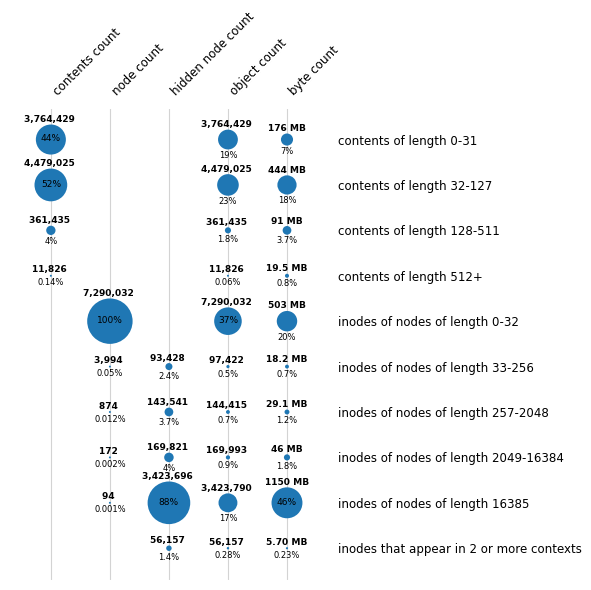

In [2]:
plot_4_vertical_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv',
                             'ekind')

💡 94 nodes have a length greater than 16k, they make up 46% of the bytes of the tree.

💡 Almost all nodes are small (i.e. with a length of 32 or less), but they only constitute 20% of the bytes of the tree.


### Objects Distance to Commit

The following plot groups the objects into 5 categories, depending on how old they are.

For instance, `<1 cycle away` implies that the objects in that row are less than 1 cycle away from
the commit in the pack file (i.e. less than 8200 blocks away, less than 3 days away). 

The `4 or more cycles away` row is the largest because most objects of a tree are at the beginning of the file, in the "snapshot import" section.



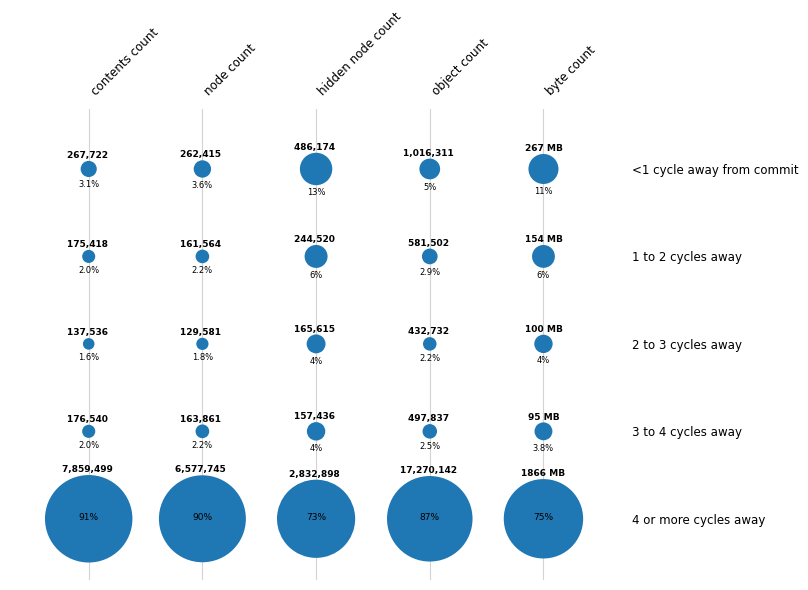

In [3]:
plot_4_vertical_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv',
                             'area_distance_from_origin')

💡 5% of the objects of the tree were created during cycle 444.

💡 While cycle 444 pushed 3149MB to the pack file, only 267MB are still useful for cycle 445 (8%).

💡 While cycle 441 pushed 3474MB to the pack file, only 95MB are still useful for cycle 445 (3%).


### Objects Path
##### 4 categories

The following plot groups the objects into 4 categories, depending on their ancestor directory.


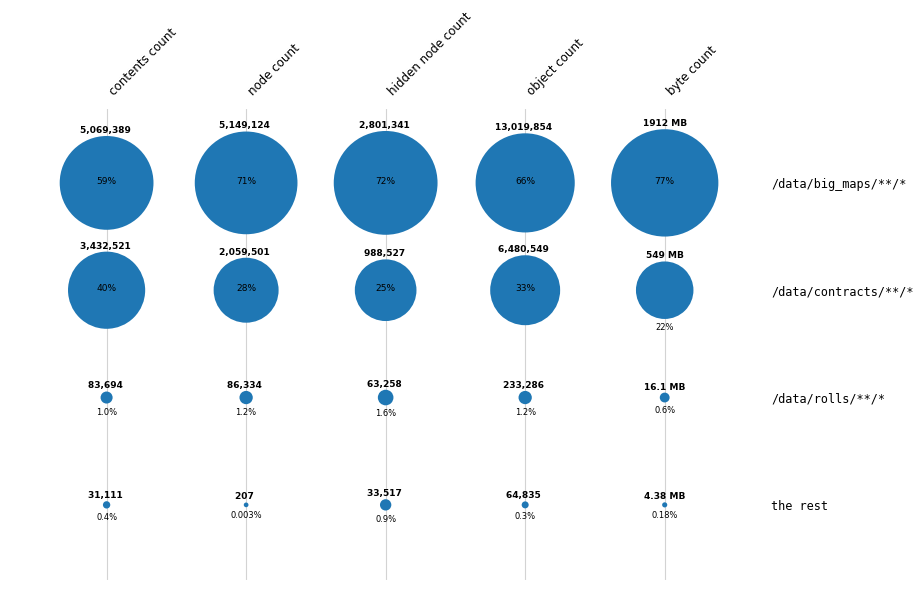

In [4]:
plot_4_vertical_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv',
                             'path2')

💡 Almost all the data is contained in `big_maps` and `contracts`.


##### 8 categories
The following plot is very similar to the previous one. It groups the objects on 8 interesting locations.

These paths are also individually analysed in separate files.


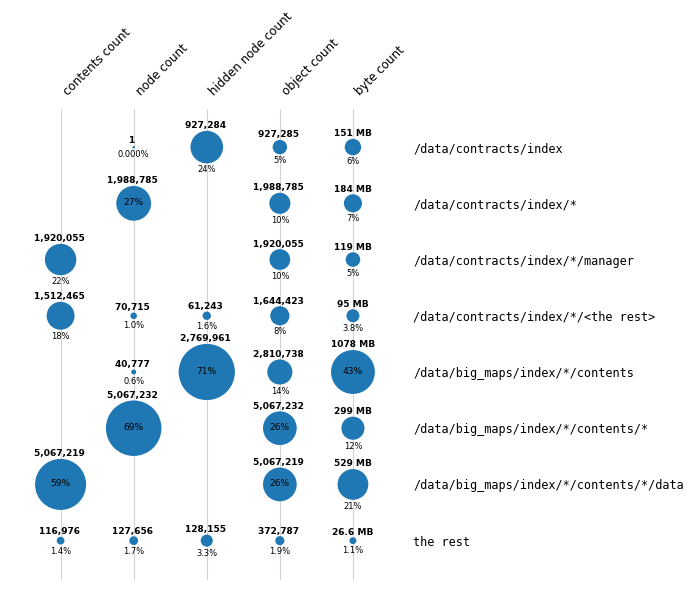

In [5]:
plot_4_vertical_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv',
                             'path3')

💡 The `/data/contracts/index` directory is made of nearly 1 million inodes.
It points to nearly 2 million nodes (i.e. `/data/contracts/index/*`).
(In practice, it points to `2,003,307` nodes but only `1,988,785` objects due to sharing).
See [tree_of_cycle_445_contracts-index.ipynb](./tree_of_cycle_445_contracts-index.ipynb).

💡 The `/data/big_maps/index/*/contents` directory has `13,890,632` sub-directories, but they
are only `5,067,232` unique sub-directories, thanks to sharing.


##### 100+ categories
The following plot groups the objects on their precise location.


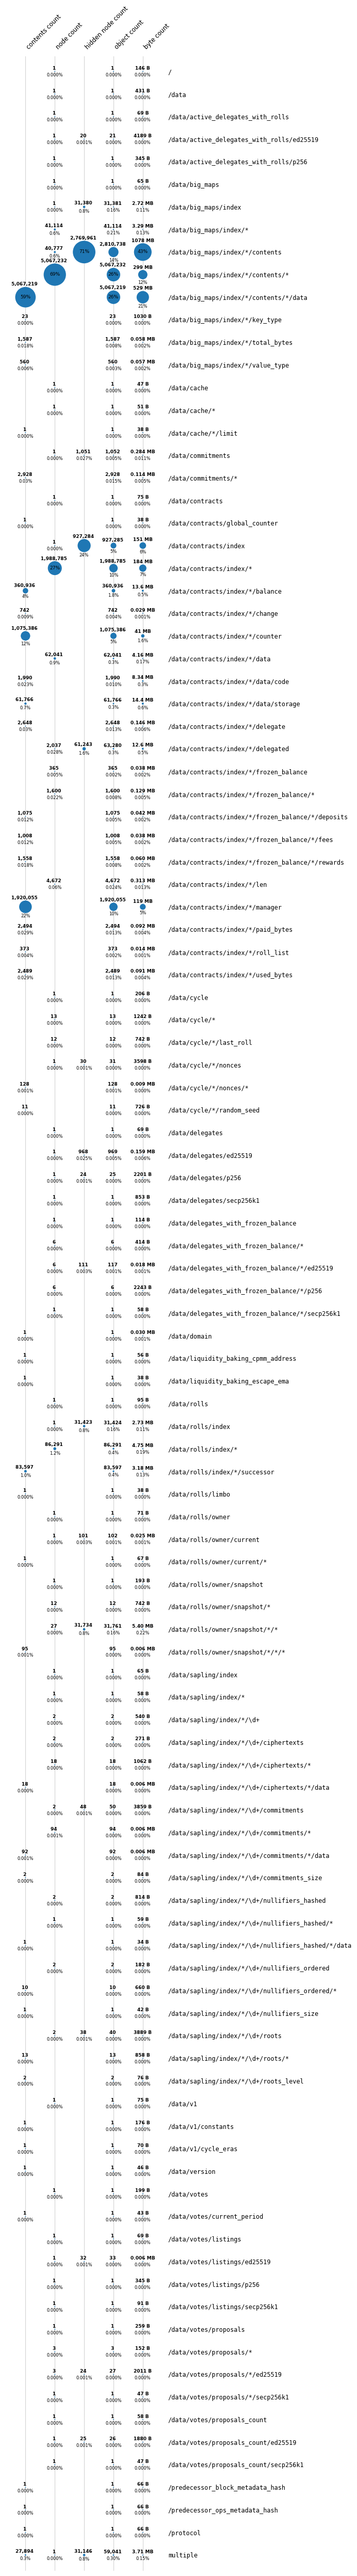

In [6]:
plot_4_vertical_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv',
                             'path')

### Distance to Commit x Kind
The following plots groups the objects in 2 grids.

##### Nodes
This plot groups the nodes in 25 categories in order to highlight when the nodes were modified (or added), depending on their size.


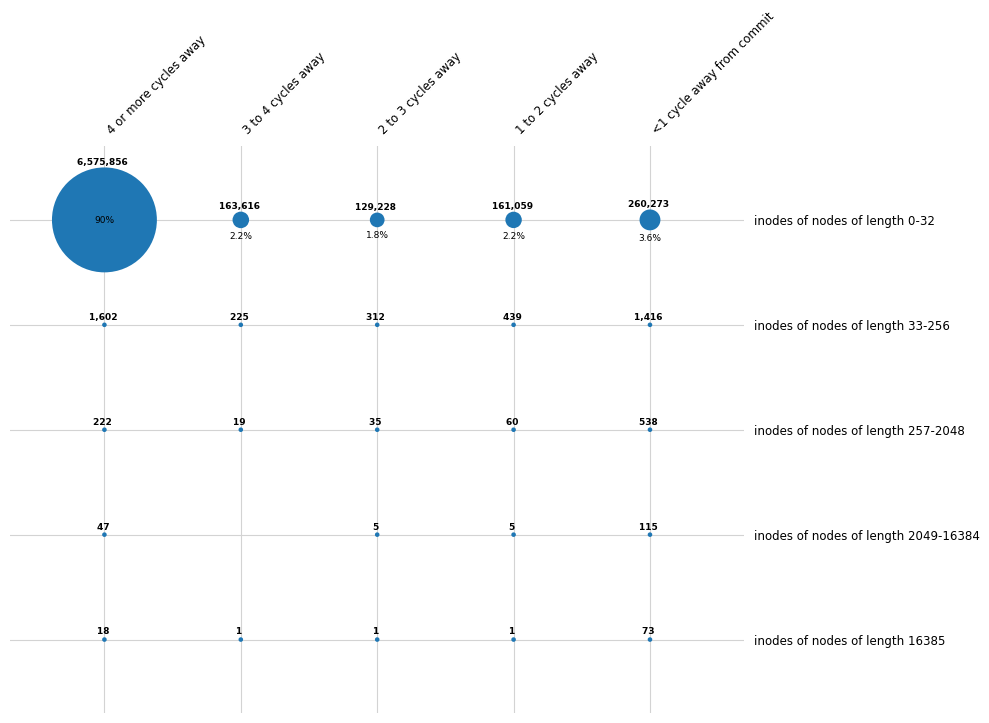

In [7]:
plot_grid_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv',
                       'node_count', 'area_distance_from_origin', 'ekind', elide_empty_rows=True)


💡 90% of the nodes are small and were not modified during the last 4 cycles.

💡 Almost all the massive nodes were modified during the last cycle (72 out of 94).


##### Bytes
This plot groups the objects in 50 categories in order to highlight where are located the bytes of the tree.


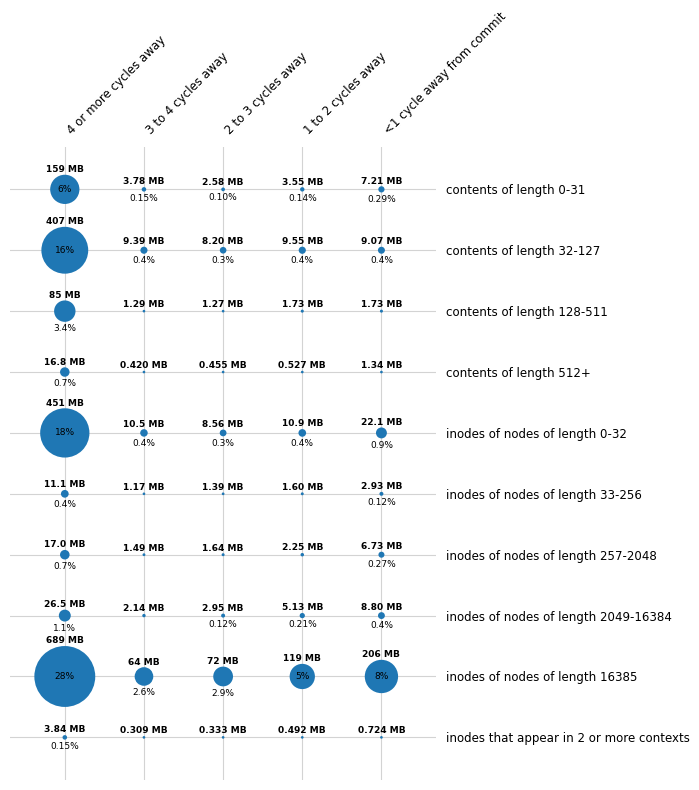

In [8]:
plot_grid_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv',
                       'bytes', 'area_distance_from_origin', 'ekind', elide_empty_rows=True)


💡 The massive nodes weigh 46% of the tree, but they dominate in the last columns, suggesting that their modification is costing a lot.


### Distance to Commit x Path
##### Bytes

This plot groups the objects in 40 categories in order to highlight where are located the bytes of the tree.


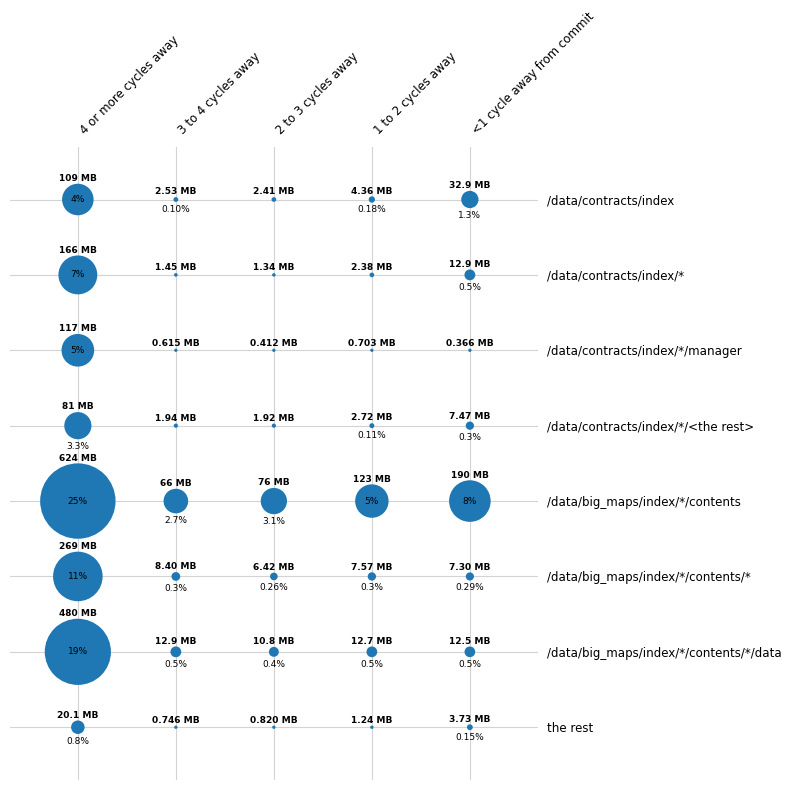

In [9]:
plot_grid_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv',
                       'bytes', 'area_distance_from_origin', 'path3')


💡 The nodes at `/data/big_maps/index/*/contents` weigh 43% of the tree, but they dominate the last columns, suggesting that their modification is costing a lot.


### Kind x Path
##### Nodes
This plot groups the nodes in 40 categories in order to highlight where can be found the nodes of each size.


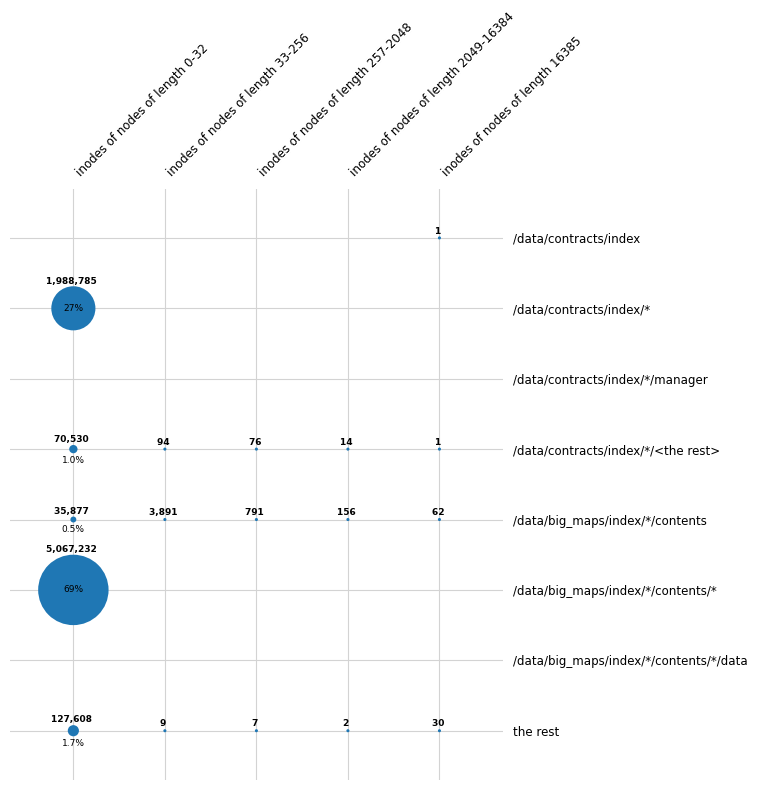

In [10]:
plot_grid_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv',
                       'node_count', 'ekind', 'path3', elide_empty_cols=True)

##### Bytes

This plot groups the objects in 80 categories in order to highlight where are located the bytes of the tree.


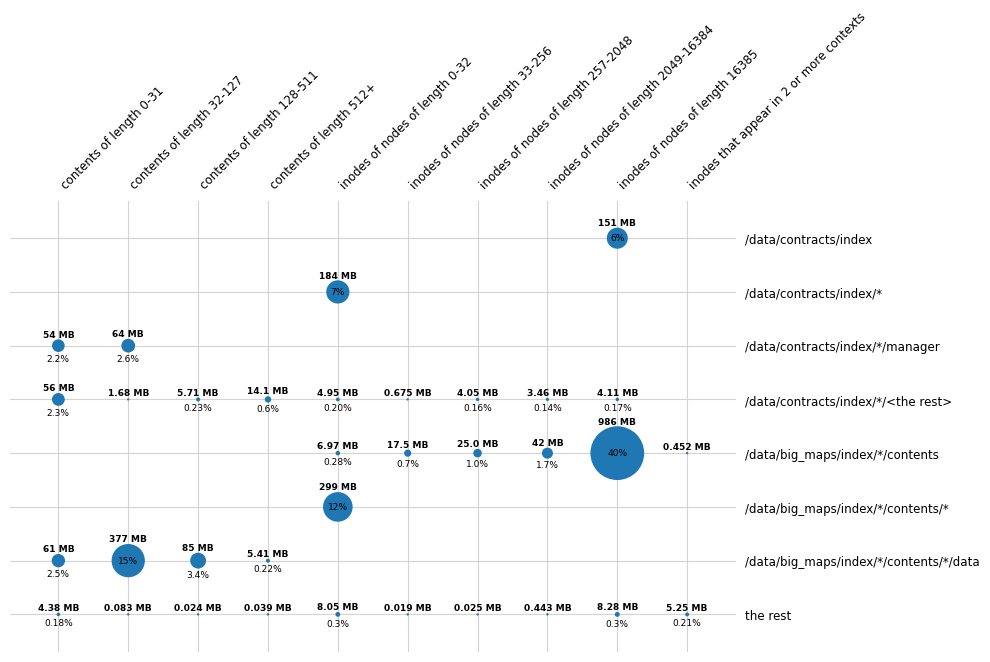

In [11]:
plot_grid_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv',
                       'bytes', 'ekind', 'path3')